# Week 4: Machine Learning and Decision Trees

<br><br>
<span style="color: red; font-size: large;">
A passing grade for this assignment requires correctly answering all questions.<br>
Ensure the correctness of your responses by comparing them, where applicable, with the notebook's outputs, and by passing all required tests.<br>
</span>



## Exercise 1: Entropy 

In this exercise, we will look at how to measure entropy in a dataset/subdataset, which we will later reuse to calculate the information gain of each single feature.  
We defined entropy in the lecture as a measure of uncertainty or chaos, and is given by the below equation.
## $ Entropy = -\sum_{e=1}^{n} (P(e)\cdot log_2(P(e))) $

We'll first start by importing the necessary libraries for the exercises.

In [1]:
#Necessary imports
from sklearn.utils import shuffle 
import random
import numpy as np
import pandas as pd
from Framework.tester import Tester

assignment_id = 4
student_number = 1

tester = Tester(assignment_id, student_number)

<span style="color: red;">**Title: Project Management Success Dataset**</span>


In this exercise, you will work with the 'Project Management Success Dataset', a realistic dataset designed for machine learning applications. This dataset contains 1,000 entries, each representing a project with various attributes that might influence its success or failure.

The dataset is comprised of 7 key features: 'Technological Complexity', 'Staff Expertise', 'Project Size', 'Requirements Quality', 'Stakeholder Management', 'Market Conditions', and 'Project Management Quality'. These features are categorized in a way that is typical for project management analysis, and they are presented using descriptive terms.

Your task is to predict the outcome of each project, labeled as either 'Success' or 'Failure'. This binary classification reflects the project's overall success based on a combination of the given features. To add a realistic challenge, the dataset includes a 10% noise factor, meaning not all entries will perfectly align with the expected outcome based on the features.

Your goal is to explore the data, gain insights into what contributes to project success, and apply suitable models to predict these outcomes.

Below, you find a description of the features and how they align and impact each other.

<span style="color: red;">**Dataset Features**</span>

**Technological Complexity:**
This feature measures the level of technical difficulty involved in the project. It ranges from 'Very Low' to 'Very High'. Projects with lower technological complexity are generally easier to manage and have a higher chance of success.

**Staff Expertise:**
This indicates the experience and skill level of the project team, from 'Very Low' to 'Very High'. Highly skilled teams are better equipped to handle complex projects and adapt to challenges, positively impacting project success.

**Project Size:** This represents the scale of the project, categorized from 'Very Small' to 'Very Large'. The size can affect the project's complexity and the resources required, influencing its success.

**Requirements Quality:** 
Ranging from 'Very Poor' to 'Super Clear', this feature reflects how well the project's requirements are understood and defined. Clearer requirements often lead to better project outcomes as they provide a solid foundation and direction.

**Stakeholder Management:** 
It evaluates how effectively stakeholders are engaged and managed, from 'Very Poor' to 'Excellent'. Effective stakeholder management can lead to better alignment of project goals, smoother decision-making, and increased project support.

**Market Conditions:** 
This feature assesses the external market environment impacting the project, from 'Very Unfavorable' to 'Very Favorable'. Favorable market conditions can enhance project success by providing a supportive external environment.

**Project Management Quality:** 
It gauges the effectiveness of the project management practices, from 'Very Poor' to 'Excellent'. High-quality project management is crucial for coordinating resources, managing risks, and ensuring project objectives are met.

<span style="color: red;">**Alignment of Features:**</span>

**Complexity and Expertise:** 
Projects with high technological complexity typically require higher staff expertise for successful completion.

**Size and Management Quality:** 
Larger projects often demand more robust project management practices due to their increased complexity and resource needs.

**Requirements Quality and Stakeholder Management:** 
Clear requirements, combined with effective stakeholder management, can significantly enhance the project's direction and support, leading to higher chances of success.

**Market Conditions and Project Success:** 
Favorable market conditions can mitigate external risks and provide opportunities, thereby influencing the project's success positively.

**Reading the dataset and printing the feature names**

In [2]:
#Reading the dataset from disk
dataset = pd.read_csv("dataset_IT_project_success.csv",skipinitialspace=True)
dataset=shuffle(dataset, random_state=100)
print('Attributes: ', dataset.columns)
print('Number of samples: ',len(dataset))

Attributes:  Index(['Technological Complexity', 'Staff Expertise', 'Project Size',
       'Requirements Quality', 'Stakeholder Management', 'Market Conditions',
       'Project Management Quality', 'Project Success'],
      dtype='object')
Number of samples:  1000


In [3]:
print ("number of features:",len(dataset.columns)-1)

number of features: 7


### Let's examine the first 10 rows of the dataset

In [4]:
dataset.head(10)

,Technological Complexity,Staff Expertise,Project Size,Requirements Quality,Stakeholder Management,Market Conditions,Project Management Quality,Project Success
249,High,Expert,Very Small,Good,Below Average,Favorable,Very Poor,Failure
353,High,Expert,Very Large,Average,Average,Very Favorable,Poor,Failure
537,Low,Intermediate,Very Small,Excellent,Excellent,Very Unfavorable,Poor,Failure
424,Very Low,Advanced,Small,Excellent,Below Average,Favorable,Excellent,Success
564,High,Beginner,Very Small,Good,Poor,Neutral,Good,Failure
124,Medium,Advanced,Small,Average,Average,Neutral,Poor,Failure
492,Medium,Beginner,Small,Below Average,Average,Neutral,Excellent,Failure
553,Very High,Novice,Medium,Excellent,Excellent,Unfavorable,Average,Failure
982,Medium,Advanced,Very Large,Below Average,Below Average,Very Favorable,Very Poor,Failure
935,Very High,Advanced,Very Small,Below Average,Poor,Unfavorable,Poor,Failure


**Question 1:**   
Write a function that takes two arguments, the dataset and the name of the class column. The function should then return the entropy of the dataset.

When implementing the entropy function, ensure that your code is flexible enough to handle a dataset with any number of class labels. Avoid hardcoding the function for only binary classification problems. Instead, design your function to dynamically accommodate a variable number of classes that might be present in the 'class' column of a dataset. 

In [5]:
def entropy(dataset,Class):
    '''
    Implement this function
    '''
    



In [6]:
tester.test(entropy)

test_entropy
Passed! Test for function 'entropy' passed.


**Question 2:**  
Use the function you defined above to calculate the entropy of the dataset. Our 'class' column is called 'Project Success'.

In [7]:
#Insert your code here

0.9647995485050872


## Exercise 2: Information Gain

As discussed in the lecture, information gain measures the decrease in entropy after a dataset is split on a feature.
Let's proceed now to calculate the information gain of a dataset given a candidate split_feature.

## $ information\_gain(S,A) = Entropy(S)-\sum_{i=1}^{n}(\frac{|Si|}{|S|}Entropy(S|A=i))$
**Question 1:**  
Write a function that takes as parameters:

1. The dataset.
2. The name of class column. (**Project Success** in our case)
3. A feature. (the name of a feature, **Requirements Quality** for example)

Your function information_gain should make use of the function entropy which you defined in exercise 1, and should return the information gain of the provided feature.

In [8]:
def information_gain(dataset, Class, feature):
    '''
    Implement this function
    '''
    



In [9]:
tester.test(information_gain)

test_information_gain
Passed! Test for function 'information_gain' passed.


**Question 2:**  
Use the function you defined above to calculate the information gain of feature/attribute **Requirements Quality**.

In [10]:
#Insert your code here

0.003367762245783501


#### Question 3:
Use the function again to calculate the information gain for all the features in your dataset. 

Exclude the 'class' column of course.

In [11]:
#Insert your code here

Information gain of Technological Complexity is: 0.003061141174960702
Information gain of Staff Expertise is: 0.005638890237511296
Information gain of Project Size is: 0.0006094383633706846
Information gain of Requirements Quality is: 0.003367762245783501
Information gain of Stakeholder Management is: 0.05163952579849007
Information gain of Market Conditions is: 0.1408304876418195
Information gain of Project Management Quality is: 0.12679245407758222


## Exercise 3: Splitting Datasets Based on Information Gain
We split a dataset based on the feature which brings the highest information gain. Your task in this exercise is to first find the attribute that maximizes the information gain, then split the dataset based on it.  

**Question 1:**

Write a function **feature_to_split_on(dataset,Class, features)** which takes as arguments the **dataset**, the **class name** and the **features**. It then returns the name of the attribute upon which the dataset will be split.

Your function should of course make use of the information_gain() function you defined above.

In [12]:
def feature_to_split_on(dataset, Class,features):
    '''
    Implement this function
    '''
    



In [13]:
tester.test(feature_to_split_on)

test_feature_to_split_on
Passed! Test for function 'feature_to_split_on' passed.


**Question 2:**  
Check that your function is working correctly by trying it on the IT project dataset.

In [14]:
#Insert your code here

Feature with the highest information gain is: Market Conditions


**Question 3:**  
Finally write a function **split_dataset(dataset,feature)** which takes as parameters:  
1. A dataset.
2. A feature. (the feature upon which we will split the dataset)  

Your function should return a list of subdatasets (in the form of dataframes).  


In [15]:
def split_dataset(dataset, feature):
    '''
    Implement this function
    '''
    



In [16]:
tester.test(split_dataset)

test_split_dataset
Test case 5: Real dataset
Number of splits: 5
Type of each split is <class 'pandas.core.frame.DataFrame'>
The splits are stored in a: <class 'list'>
Passed! Test for function 'split_dataset' passed.


Be aware that the splits are organized in a list format, with each specific split being represented as a pandas DataFrame.

It's crucial to comply with these data type specifications for both the individual splits and the overall structure containing them. This compliance is key for the functioning of the ID3 algorithm.

## Exercise 4: Iterative Dichotomiser 3



**Question 1:**  
Write a function **train_test_split(dataset, ratio)** which takes a dataset as an input and returns two datasets one for training and another for testing. The ratio specifies the percentage of datapoints dedicated for testing.

For our example dataset, we have a 1000 rows and so calling your function with the parameters **(dataset, 0.25)** will return a training set with 750 rows and a testing set with 250 rows.

**The Split Order**

The **training set** must contain the **first** \( n \) rows of the dataset, and the **testing set** must contain the **last** \( m \) rows.

**Shuffling**

**Do not shuffle the dataset.** It was shuffled already after we loaded the dataset.

**Reindexing**

Ensure both the training and testing sets are reindexed to start from 0.


In [17]:
def train_test_split(dataset, ratio):
    '''
    Implement this function
    '''



In [18]:
tester.test(train_test_split)

test_train_test_split
Test case 3: Real dataset with 75-25 split
train.shape: (750, 8)
test.shape: (250, 8)
Train type: <class 'pandas.core.frame.DataFrame'>
Test type: <class 'pandas.core.frame.DataFrame'>
Passed! Test for function 'train_test_split' passed.


**Question 2:**  
Test whether your function produces the two subdatasets correctly. Print the shape of the test set below.

In [19]:
#Insert code here

train.shape: (750, 8)
test.shape: (250, 8)
Train type: <class 'pandas.core.frame.DataFrame'>
Test type: <class 'pandas.core.frame.DataFrame'>

First 5 rows of the test set


,Technological Complexity,Staff Expertise,Project Size,Requirements Quality,Stakeholder Management,Market Conditions,Project Management Quality,Project Success
0,Low,Intermediate,Medium,Poor,Below Average,Very Unfavorable,Poor,Failure
1,Low,Intermediate,Very Small,Poor,Below Average,Very Favorable,Very Poor,Failure
2,Medium,Novice,Medium,Good,Average,Neutral,Excellent,Success
3,High,Advanced,Medium,Good,Average,Neutral,Excellent,Failure
4,Medium,Beginner,Very Small,Good,Good,Neutral,Very Poor,Failure


Notice that the test set above is reindexed properly.

### Training and using the classifier

### ID3 Algorithm

We describe below the Iterative Dichotomiser algorithm in detail.

This should make use of the functions you implemented above.

<code style="font-family: 'Courier New', monospace; background-color: #f9f9f9; padding: 10px; border-radius: 8px; border: 1px solid #ccc; display: block; white-space: pre-wrap;">
  <b style="color: #d73a49;">Function ID3(dataset, Class, features):</b><br>
  &emsp;<span style="color: #005cc5;"># If dataset is empty:</span><br>
  &emsp;&emsp;Return 'None'<br>
  &emsp;<span style="color: #005cc5;"># If all rows have the same class:</span><br>
  &emsp;&emsp;Return the class value<br>
  &emsp;<span style="color: #005cc5;"># If the features list is empty:</span><br>
  &emsp;&emsp;Return the most common class value<br>
  &emsp;<span style="color: #005cc5;"># Determine the best feature:</span><br>
  &emsp;&emsp;<span style="color: #22863a;">best_feature &larr; feature_to_split_on(dataset, Class, features)</span><br>
  &emsp;<span style="color: #005cc5;"># If best_feature is None:</span><br>
  &emsp;&emsp;Return the most common class value<br>
  &emsp;<span style="color: #005cc5;"># Initialize tree with best_feature:</span><br>
  &emsp;&emsp;<span style="color: #22863a;">tree &larr; {} with best_feature as the key</span><br>
  &emsp;<span style="color: #005cc5;"># For each unique value in best_feature:</span><br>
  &emsp;&emsp;<span style="color: #22863a;">subset &larr; dataset where best_feature equals the unique value</span><br>
  &emsp;&emsp;<span style="color: #22863a;">subtree &larr; ID3(subset, Class, remaining features)</span><br>
  &emsp;&emsp;<span style="color: #22863a;">tree[best_feature][value] &larr; subtree</span><br>
  &emsp;<span style="color: #005cc5;"># Return tree</span><br>
</code>





In [20]:
def id3(dataset, Class, features):
    # Base case 1: no rows left, return none 
    if len(dataset) == 0:
        return 'None'

    # Base case 2: all rows have the same label, turn the node into a leaf and exit (as discussed in the lecture)
    if len(dataset[Class].unique()) == 1:
        return dataset[Class].iloc[0]

    # rows left have the same values for all features, but different labels, return the most dominant label (as discussed in the lecture)
    if len(features) == 0:
        return dataset[Class].mode()[0]

    # Choose the best feature to split on (make sure you implement this correctly)
    best_feature = feature_to_split_on(dataset, Class, features)

    # All features have the same information gain, return most dominant class
    if best_feature is None:
        return dataset[Class].mode()[0]

    # We'll store our tree in a dictionary
    tree = {best_feature: {}}
    remaining_features = [f for f in features if f != best_feature]

    # We'll split the dataset based on the best feature values
    for value in dataset[best_feature].unique():
        subset = dataset[dataset[best_feature] == value]
        subtree = id3(subset, Class, remaining_features)
        tree[best_feature][value] = subtree

    return tree


**Let's call our ID3 algorithm**

Two things to keep in mind:

1. The features is a list of feature names (column names) that excludes the label column.
2. The Class is simply "Project Success"

If the algorithm executes successfully, it will return a dictionary. Store that in a variable named **tree**. If you name the tree diffrently, make sure to adjust this variable name appropriately in the following code examples.

**Question 3:**

Call your id3(dataset, Class, features) function on the train dataframe to induce a decision tree.

In [21]:
#Your answer goes here

In [22]:
'''We're printing our tree dictionary here. It will be challenging to compare our outputs, but you should be 
able to tell whether your implementation is correct if you get the prediction part working properly.'''
tree

{'Market Conditions': {'Favorable': {'Project Management Quality': {'Very Poor': {'Stakeholder Management': {'Below Average': 'Failure',
      'Poor': {'Technological Complexity': {'Low': {'Requirements Quality': {'Average': 'Failure',
          'Below Average': 'Success'}},
        'Very Low': 'Failure',
        'Medium': 'Failure'}},
      'Average': 'Failure',
      'Excellent': {'Technological Complexity': {'High': 'Failure',
        'Medium': 'Success',
        'Very High': 'Failure',
        'Very Low': 'Success'}},
      'Good': {'Project Size': {'Large': 'Success',
        'Very Small': 'Success',
        'Very Large': 'Failure'}}}},
    'Excellent': {'Staff Expertise': {'Advanced': 'Success',
      'Intermediate': {'Project Size': {'Very Large': 'Success',
        'Large': 'Failure',
        'Small': 'Success'}},
      'Novice': 'Success',
      'Expert': 'Success',
      'Beginner': 'Success'}},
    'Poor': {'Project Size': {'Large': 'Failure',
      'Very Small': {'Stakehold

Let's proceed to print our decision tree as **if statements**

In [23]:
def print_tree(tree, indent=0):
    if not isinstance(tree, dict):
        print(' ' * indent + f"return {tree}")
        return
    for feature, branches in tree.items():
        for branch, subtree in branches.items():
            if indent == 0:
                print(f"if {feature} == {branch}:")
            else:
                print(' ' * indent + f"if {feature} == {branch}:")
            print_tree(subtree, indent + 5)



In [24]:
print_tree(tree)

if Market Conditions == Favorable:
     if Project Management Quality == Very Poor:
          if Stakeholder Management == Below Average:
               return Failure
          if Stakeholder Management == Poor:
               if Technological Complexity == Low:
                    if Requirements Quality == Average:
                         return Failure
                    if Requirements Quality == Below Average:
                         return Success
               if Technological Complexity == Very Low:
                    return Failure
               if Technological Complexity == Medium:
                    return Failure
          if Stakeholder Management == Average:
               return Failure
          if Stakeholder Management == Excellent:
               if Technological Complexity == High:
                    return Failure
               if Technological Complexity == Medium:
                    return Success
               if Technological Complexity == Very Hig

Remember, in the machine learning paradigm, the system deduces the rules from the provided input/output pairs. This is distinct from traditional programming, where you supply both the input and the rules, and the machine computes the output based on these.

The rules presented above are those we have derived from the input/output pairs and are expressed in Python syntax.

Let's now write a **make_prediction(decision_tree, data_instance)** function. It takes the tree as a dictionary and a row from the dataset and infers its label.

We also implement a **predict_for_dataset(decision_tree, dataset)** function to be able to run the **make_prediction(decision_tree, data_instance)** function over the full test set.

In [25]:
def make_prediction(decision_tree, data_instance):
    if not isinstance(decision_tree, dict):
        return decision_tree

    for attribute, sub_trees in decision_tree.items():
        attribute_value = data_instance[attribute]
        if attribute_value in sub_trees:
            return make_prediction(sub_trees[attribute_value], data_instance)
    #Hardcoded
    return 'Failure'


def predict_for_dataset(decision_tree, dataset):
    results = []
    for _, data_instance in dataset.iterrows():
        result = make_prediction(decision_tree, data_instance)
        results.append(result)

    return results


In [26]:
predictions=predict_for_dataset(tree, train)
ground_truth=train['Project Success']
correct=[]
for i in range(0,len(ground_truth)):
    if ground_truth[i]==predictions[i]:
        correct.append(1)
    else:
        correct.append(0)
print("Accuracy on train set is",sum(correct)/len(ground_truth)*100,"%")
print("The indexes of the misclassified rows")
print([i for i, x in enumerate(correct) if x == 0])
for i in [i for i, x in enumerate(correct) if x == 0]:
    print("Predicted", predictions[i], ", Actual", ground_truth[i])

predictions=predict_for_dataset(tree, test)
ground_truth=test['Project Success']
correct=[]
for i in range(0,len(ground_truth)):
    if ground_truth[i]==predictions[i]:
        correct.append(1)
    else:
        correct.append(0)
print("____\n")
print("Accuracy on test set is",sum(correct)/len(ground_truth)*100,"%")
print("The indexes of the misclassified rows")
print([i for i, x in enumerate(correct) if x == 0])
for i in [i for i, x in enumerate(correct) if x == 0]:
    print("Predicted", predictions[i], ", Actual", ground_truth[i])

Accuracy on train set is 100.0 %
The indexes of the misclassified rows
[]
____

Accuracy on test set is 80.80000000000001 %
The indexes of the misclassified rows
[2, 7, 14, 22, 28, 32, 33, 36, 37, 40, 43, 46, 48, 58, 75, 80, 88, 92, 98, 103, 107, 108, 112, 114, 117, 121, 125, 131, 138, 145, 148, 156, 160, 162, 164, 166, 177, 179, 197, 200, 202, 203, 207, 214, 221, 225, 238, 247]
Predicted Failure , Actual Success
Predicted Success , Actual Failure
Predicted Failure , Actual Success
Predicted Failure , Actual Success
Predicted Success , Actual Failure
Predicted Failure , Actual Success
Predicted Failure , Actual Success
Predicted Failure , Actual Success
Predicted Failure , Actual Success
Predicted Success , Actual Failure
Predicted Failure , Actual Success
Predicted Failure , Actual Success
Predicted Failure , Actual Success
Predicted Success , Actual Failure
Predicted Failure , Actual Success
Predicted Success , Actual Failure
Predicted Failure , Actual Success
Predicted Failure , Act

If the test and train sets are not reindexed properly and you're unable to run the cell above, then change the statement  **ground_truth=train['Project Success']** into **ground_truth=train['Project Success'].values** (do the same for the test ground truth).

**Question 4:**

**80% accuracy** sounds like a decent result given the size of our dataset (and the fact that we didn't do any feature engineering). 

Let's see if the recall and the precision of the class failure agree with the accuracy score.

You should of course work with the predictions made on the test set.

Count the TP, FP, TN, FN, by comparing the array of predictions to that of the actual labels. You should then be able to calculate the precision and the recall for the class **failure**.

In [27]:
#Add your code here

Recall for class Failure: 0.8962962962962963
Precision for class Failure: 0.7806451612903226


**The precision and recall of the model are good, indicating that the model is able to generalize**.

## Exercise 5: Compairing your Decision Tree with SKlearn's


**Question 1:**  
  
Use the **DecisionTreeClassifier** available in the **sklearn** library to train a decision tree model on the dataset we've been working on so far.    

Fine-tune the treeclassifier as you see fit and make sure it uses **entropy** not **gini** as a criterion.   

Check the accuracy of the sklearn classifier and compare it to the one we implemented.  

Show the following:


- The accuracy of the model on the test set.

- The recall of the class **Failure**.

- The precision of the class **Failure**.

- The confusion matrix using sklearn. 

A few things to keep in mind:

1. The sklearn classifier isn't friendly to text features, it only accepts numerical features. You will need to encode the feature values as integer values.
2. When you print the tree, it's going to be unreadable due to its size. Limit the depth of the tree to 3. It will fail to generalize, but you will be able to see how it looks like. Our earlier implementation isn't as fancy as the sklearn one, so we have no proper visualization for the tree.



In [28]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

Mapping for the last column: {0: 'Failure', 1: 'Success'}


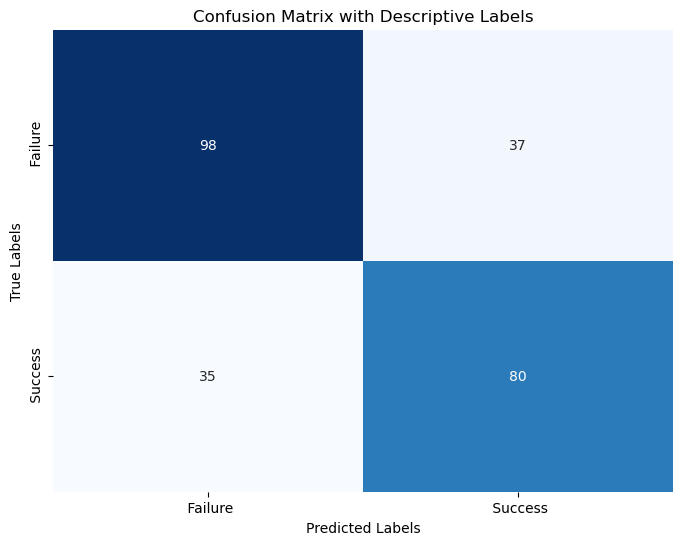

The accuracy of the model on the test set is: 71.20%
Recall for class 'Failure': 0.7259
Precision for class 'Failure': 0.7368


In [29]:
accuracy_score(dataset)
print()

**Question 2:**  

Display the decision tree sklearn has induced.

This should help [here](https://mljar.com/blog/visualize-decision-tree/)

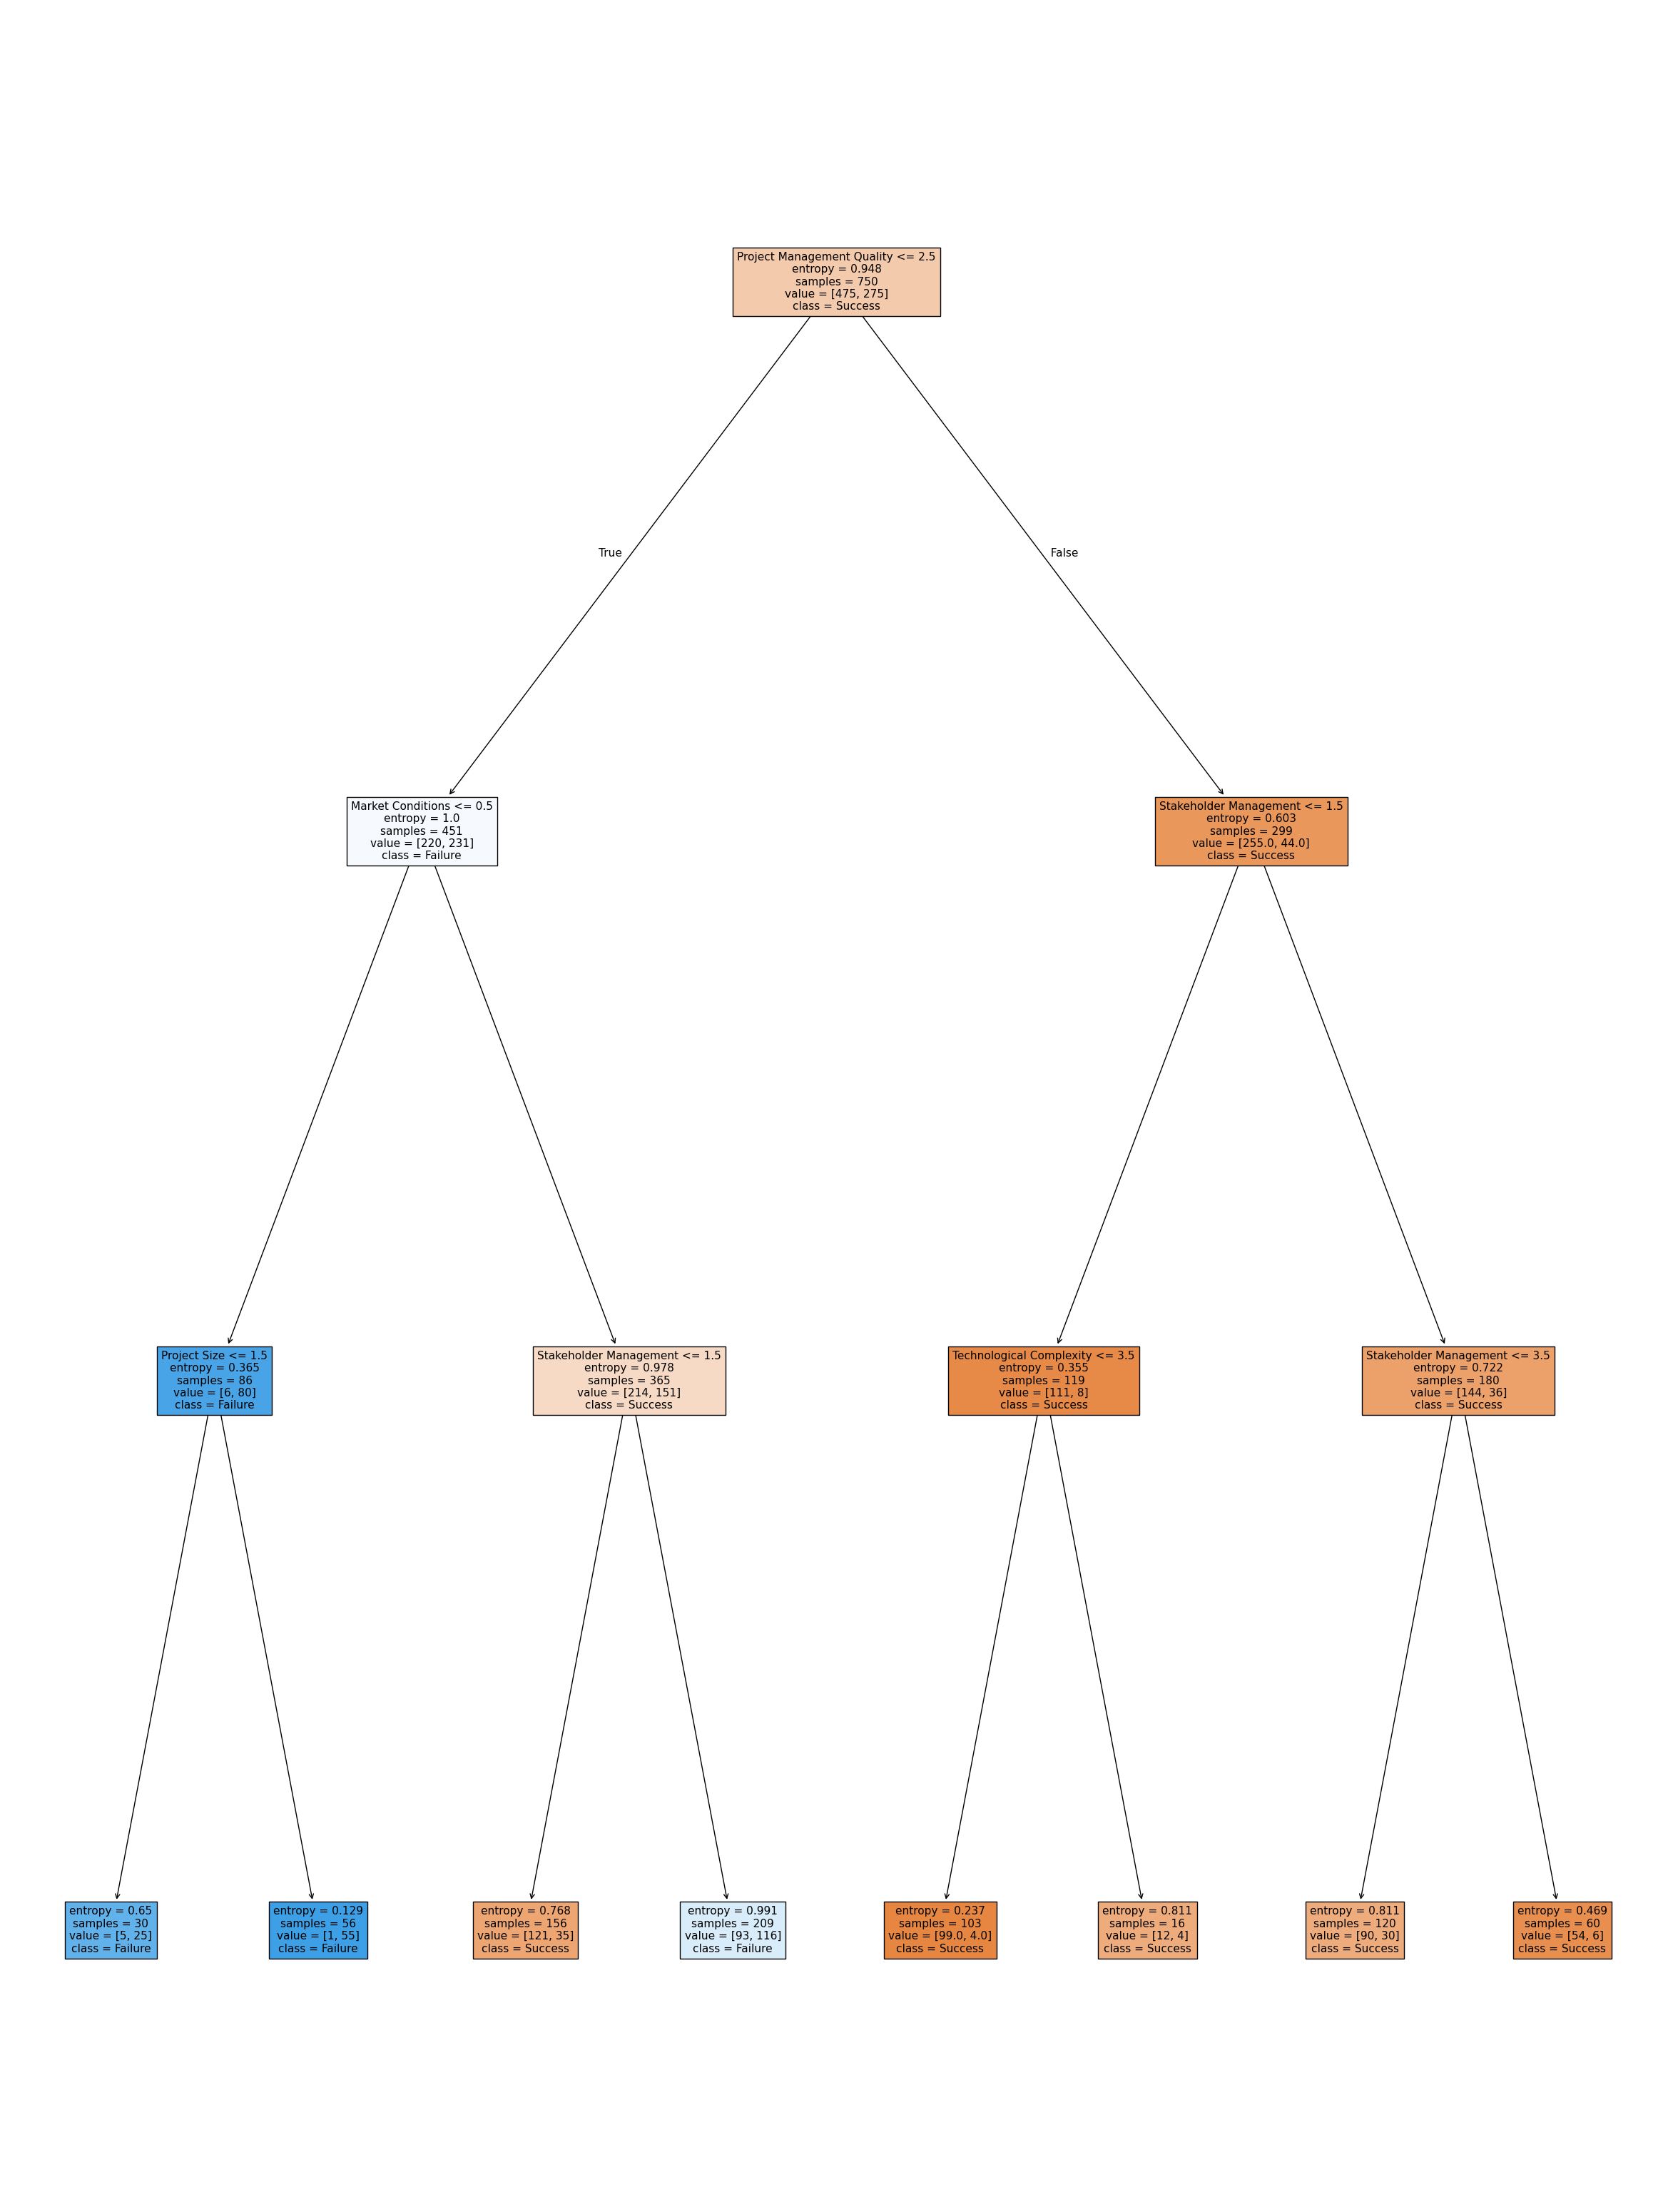

In [30]:
#Add your code here